Here we will just check the effiency against an optimized and universal library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [2]:
raw_df = pd.read_csv('sevenfive.csv')
test_df = pd.read_csv('sevenfiveVALIDATION.csv')

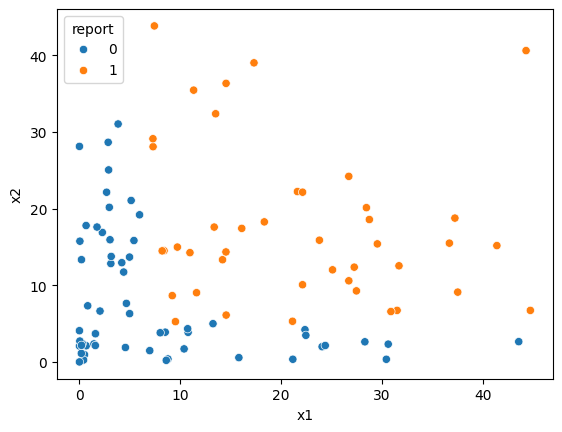

In [3]:
sns.scatterplot(data=raw_df.sample(100), x='x1', y='x2', hue='report');

In [4]:
inputs_df = raw_df[['x1','x2']]
targets_df = raw_df[['report']]
test_inputs_df = test_df[['x1','x2']]
test_targets_df = test_df[['report']]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(inputs_df)

StandardScaler()

In [7]:
inputs_df = scaler.transform(inputs_df)
test_inputs_df = scaler.transform(test_inputs_df)

In [8]:
from sklearn import tree

In [9]:
model = tree.DecisionTreeClassifier(random_state=42, max_depth=2, max_leaf_nodes = 3)
model.fit(inputs_df, targets_df)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=42)

In [10]:
print(model.score(inputs_df, targets_df), model.score(test_inputs_df, test_targets_df))

1.0 0.999


In [11]:
singleinput = scaler.transform([[7,5]])

E:\USER\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
model.predict(singleinput+0.01)

array([1], dtype=int64)

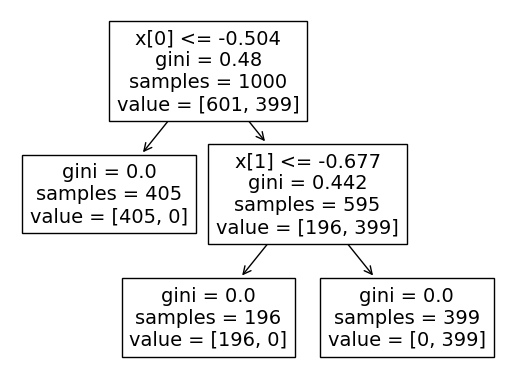

In [13]:
tree.plot_tree(model);

In [14]:
def NodeCost(outputActivation: float, expectedOutput: float) -> float:
    return (outputActivation - expectedOutput) ** 2

In [15]:
def Cost(predicted: List, expected: List) -> float:
    assert len(predicted) == len(expected), "The outputs must be the same length"
    price = []
    for i in range(len(predicted)):
        price.append(NodeCost(predicted[i], expected[i]))
    return np.mean(price)

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Cambia el valor de learning_rate según lo que desees
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Imprimir un resumen del modelo
model.summary()

# Los datos de entrada (x1 y x2) y las etiquetas (Veredicto) deben estar en arrays NumPy
# Asumiendo que tienes tus datos en variables x_train (entradas) y y_train (etiquetas), puedes entrenar el modelo de la siguiente manera:
model.fit(inputs_df, targets_df, epochs=50, batch_size=1)

# Una vez entrenado, puedes usar el modelo para hacer predicciones
predictions = model.predict(inputs_df)  # x_test contiene tus datos de prueba

# Las predicciones estarán en el rango de 0 a 1, puedes convertirlas a 0 o 1 usando un umbral:
threshold = 0.75
binary_predictions = (predictions > threshold).astype(int)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1000/1000 [==============================] - 9s 3ms/step - loss: 0.7007 - accuracy: 0.4640
Epoch 2/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6049 - accuracy: 0.6740
Epoch 3/50
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5367 - accuracy: 0.7580
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4893 - accuracy: 0.7790
Epoch 5/50
1000/1000 [==========================

In [19]:
predictions = model.predict(inputs_df)  # x_test contiene tus datos de prueba

# Las predicciones estarán en el rango de 0 a 1, puedes convertirlas a 0 o 1 usando un umbral:
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

32/32 [==============================] - 0s 2ms/step


In [20]:
Cost(binary_predictions, targets_df.to_numpy())

0.029

In [21]:
predictions = model.predict(test_inputs_df)  # x_test contiene tus datos de prueba

# Las predicciones estarán en el rango de 0 a 1, puedes convertirlas a 0 o 1 usando un umbral:
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

32/32 [==============================] - 0s 2ms/step


In [22]:
Cost(binary_predictions, test_targets_df.to_numpy())

0.032

In [23]:
model.predict(singleinput+0.2)

1/1 [==============================] - 0s 21ms/step


array([[0.52287877]], dtype=float32)

In [24]:
singleinput

array([[-0.50450496, -0.6801852 ]])